In [1]:
import re

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
polinomial_train_log = pd.read_json('./model/03.18-08:39:44-cosine-ppo-train-log.json')
polinomial_train_log.head()

,reward,left_steps_frac,eval reward,eval reward (sum)
0,-2.581630,0.976879,0,0
1,-1.822724,0.929598,0,0
2,-1.547225,0.882317,0,0
3,-1.384825,0.835035,0,0
4,-1.268591,0.787754,0,0


<Axes: >

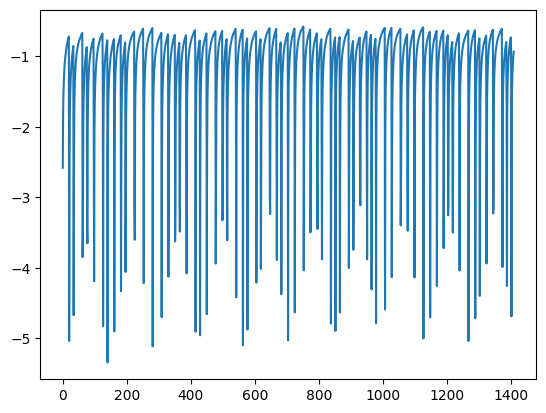

In [10]:
polinomial_train_log['reward'].plot.line()

In [ ]:
reward_lt = []
with open('./ppo-linear.out', 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    line = re.findall(r'reward=-[0-9]+[.][0-9]+', line)
    if len(line) == 0 or line[0] == '':
        lines.pop(i)
        continue
    line = line[0][len('reward='):]
    line = float(line)
    lines[i] = line
lines = lines[6:-1]


In [ ]:
reward_df = pd.DataFrame({
    'reward': lines,
})

<Axes: >

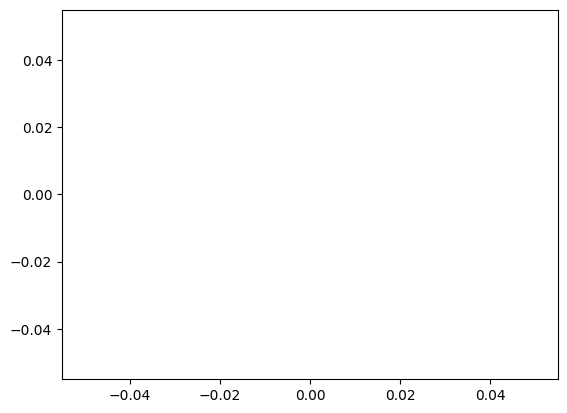

In [ ]:
reward_df['reward'][:-3000].plot.line()

In [3]:
acc = pd.read_json('./result/mlp-mnist-acc-4.json')
acc.head()

,03.17-13:38:41-cosine,03.17-14:00:51-polynomial,03.18-08:39:44-cosine-final-ppo,03.18-15:44:18-polynomial-final-ppo,03.18-16:48:38-linear,03.18-19:23:45-linear-final-ppo,linear,cosine_with_restarts,polynomial
0,0.0682,0.1203,0.0713,0.1029,0.1145,0.0928,0.1089,0.0972,0.1276
1,0.0758,0.1093,0.0845,0.1121,0.1108,0.1115,0.1135,0.1005,0.1304
2,0.0832,0.0992,0.0889,0.1208,0.1031,0.1198,0.1241,0.1057,0.1379
3,0.0863,0.0964,0.0882,0.1250,0.0956,0.1266,0.1413,0.1129,0.1452
4,0.0864,0.0963,0.0877,0.1246,0.0883,0.1296,0.1577,0.1242,0.1557


In [4]:
acc.describe()

,03.17-13:38:41-cosine,03.17-14:00:51-polynomial,03.18-08:39:44-cosine-final-ppo,03.18-15:44:18-polynomial-final-ppo,03.18-16:48:38-linear,03.18-19:23:45-linear-final-ppo,linear,cosine_with_restarts,polynomial
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.092578,0.099053,0.086723,0.110997,0.075360,0.152222,0.138832,0.108833,0.101875
std,0.005183,0.003829,0.002252,0.006859,0.008974,0.013602,0.019334,0.008435,0.022936
min,0.068200,0.094700,0.071300,0.101400,0.068200,0.092800,0.108900,0.097200,0.088100
25%,0.090325,0.096675,0.086300,0.103800,0.072375,0.147350,0.124975,0.103175,0.089275
50%,0.095100,0.098000,0.087000,0.110350,0.073400,0.155800,0.130950,0.106050,0.091200
75%,0.095700,0.101250,0.087625,0.116850,0.074000,0.161325,0.146400,0.110800,0.100100
max,0.096900,0.120300,0.089100,0.125000,0.114500,0.163800,0.186100,0.138300,0.177500


In [3]:
losses = pd.read_json('./result/mlp-mnist-loss-4.json')
losses.head()

,03.17-13:38:41-cosine_train_loss,03.17-13:38:41-cosine_eval_loss,03.17-14:00:51-polynomial_train_loss,03.17-14:00:51-polynomial_eval_loss,03.18-08:39:44-cosine-final-ppo_train_loss,03.18-08:39:44-cosine-final-ppo_eval_loss,03.18-15:44:18-polynomial-final-ppo_train_loss,03.18-15:44:18-polynomial-final-ppo_eval_loss,03.18-16:48:38-linear_train_loss,03.18-16:48:38-linear_eval_loss,03.18-19:23:45-linear-final-ppo_train_loss,03.18-19:23:45-linear-final-ppo_eval_loss,linear_train_loss,linear_eval_loss,cosine_with_restarts_train_loss,cosine_with_restarts_eval_loss,polynomial_train_loss,polynomial_eval_loss
0,2.335200,0.0,2.276780,0.0,2.329068,0.0,2.311133,0.0,2.331342,0.0,2.337499,0.0,2.320960,0.0,2.354692,0.0,2.314124,0.0
1,2.325794,0.0,2.272685,0.0,2.313495,0.0,2.323358,0.0,2.337083,0.0,2.320800,0.0,2.317603,0.0,2.366094,0.0,2.340749,0.0
2,2.311538,0.0,2.278507,0.0,2.339519,0.0,2.325376,0.0,2.324767,0.0,2.316207,0.0,2.313093,0.0,2.367644,0.0,2.329389,0.0
3,2.293839,0.0,2.268038,0.0,2.333982,0.0,2.320840,0.0,2.350842,0.0,2.329939,0.0,2.362508,0.0,2.375618,0.0,2.326758,0.0
4,2.311886,0.0,2.282868,0.0,2.329089,0.0,2.343172,0.0,2.316647,0.0,2.317624,0.0,2.333622,0.0,2.360512,0.0,2.341959,0.0


In [4]:
losses.columns

Index(['03.17-13:38:41-cosine_train_loss', '03.17-13:38:41-cosine_eval_loss',
       '03.17-14:00:51-polynomial_train_loss',
       '03.17-14:00:51-polynomial_eval_loss',
       '03.18-08:39:44-cosine-final-ppo_train_loss',
       '03.18-08:39:44-cosine-final-ppo_eval_loss',
       '03.18-15:44:18-polynomial-final-ppo_train_loss',
       '03.18-15:44:18-polynomial-final-ppo_eval_loss',
       '03.18-16:48:38-linear_train_loss', '03.18-16:48:38-linear_eval_loss',
       '03.18-19:23:45-linear-final-ppo_train_loss',
       '03.18-19:23:45-linear-final-ppo_eval_loss', 'linear_train_loss',
       'linear_eval_loss', 'cosine_with_restarts_train_loss',
       'cosine_with_restarts_eval_loss', 'polynomial_train_loss',
       'polynomial_eval_loss'],
      dtype='object')

In [5]:
train_loss = losses[[col for col in losses.columns if col.endswith('_train_loss')]]
eval_loss = losses[[col for col in losses.columns if col.endswith('_eval_loss')]]
train_loss

,03.17-13:38:41-cosine_train_loss,03.17-14:00:51-polynomial_train_loss,03.18-08:39:44-cosine-final-ppo_train_loss,03.18-15:44:18-polynomial-final-ppo_train_loss,03.18-16:48:38-linear_train_loss,03.18-19:23:45-linear-final-ppo_train_loss,linear_train_loss,cosine_with_restarts_train_loss,polynomial_train_loss
0,2.335200,2.276780,2.329068,2.311133,2.331342,2.337499,2.320960,2.354692,2.314124
1,2.325794,2.272685,2.313495,2.323358,2.337083,2.320800,2.317603,2.366094,2.340749
2,2.311538,2.278507,2.339519,2.325376,2.324767,2.316207,2.313093,2.367644,2.329389
3,2.293839,2.268038,2.333982,2.320840,2.350842,2.329939,2.362508,2.375618,2.326758
4,2.311886,2.282868,2.329089,2.343172,2.316647,2.317624,2.333622,2.360512,2.341959
...,...,...,...,...,...,...,...,...,...
14095,0.075575,0.125757,0.098877,0.090919,0.115891,0.119247,0.184340,0.146137,0.145288
14096,0.208100,0.197782,0.129748,0.235407,0.322814,0.241914,0.339271,0.365195,0.359896
14097,0.127941,0.135176,0.131668,0.104567,0.154429,0.133021,0.247812,0.244283,0.197406
14098,0.268706,0.237053,0.195533,0.274808,0.314840,0.242612,0.313269,0.346018,0.318238


In [6]:
train_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
03.17-13:38:41-cosine_train_loss,14100.0,0.473354,0.338539,0.075575,0.293869,0.369884,0.506228,2.335200
03.17-14:00:51-polynomial_train_loss,14100.0,0.506291,0.341415,0.125757,0.321250,0.405461,0.542778,2.307874
03.18-08:39:44-cosine-final-ppo_train_loss,14100.0,0.385306,0.300990,0.082813,0.229517,0.301396,0.414427,2.339519
03.18-15:44:18-polynomial-final-ppo_train_loss,14100.0,0.447370,0.331817,0.090919,0.275269,0.351784,0.477021,2.355028
03.18-16:48:38-linear_train_loss,14100.0,0.586237,0.381703,0.115891,0.372525,0.466302,0.620499,2.360527
03.18-19:23:45-linear-final-ppo_train_loss,14100.0,0.536150,0.353761,0.119247,0.347539,0.432228,0.565280,2.345642
linear_train_loss,14100.0,0.728096,0.551956,0.184340,0.401507,0.502595,0.724537,2.384502
cosine_with_restarts_train_loss,14100.0,0.752419,0.578848,0.146137,0.414559,0.510588,0.735122,2.419095
polynomial_train_loss,14100.0,0.739143,0.549505,0.145288,0.416287,0.511636,0.728020,2.372846


In [7]:
train_loss.isna().sum()

03.17-13:38:41-cosine_train_loss                  0
03.17-14:00:51-polynomial_train_loss              0
03.18-08:39:44-cosine-final-ppo_train_loss        0
03.18-15:44:18-polynomial-final-ppo_train_loss    0
03.18-16:48:38-linear_train_loss                  0
03.18-19:23:45-linear-final-ppo_train_loss        0
linear_train_loss                                 0
cosine_with_restarts_train_loss                   0
polynomial_train_loss                             0
dtype: int64

In [8]:
train_loss.loc[-64:, :].mean().sort_values(ascending=True)

03.18-08:39:44-cosine-final-ppo_train_loss        0.385306
03.18-15:44:18-polynomial-final-ppo_train_loss    0.447370
03.17-13:38:41-cosine_train_loss                  0.473354
03.17-14:00:51-polynomial_train_loss              0.506291
03.18-19:23:45-linear-final-ppo_train_loss        0.536150
03.18-16:48:38-linear_train_loss                  0.586237
linear_train_loss                                 0.728096
polynomial_train_loss                             0.739143
cosine_with_restarts_train_loss                   0.752419
dtype: float64

Text(0.5, 1.0, 'Polynomial IL + PPO')

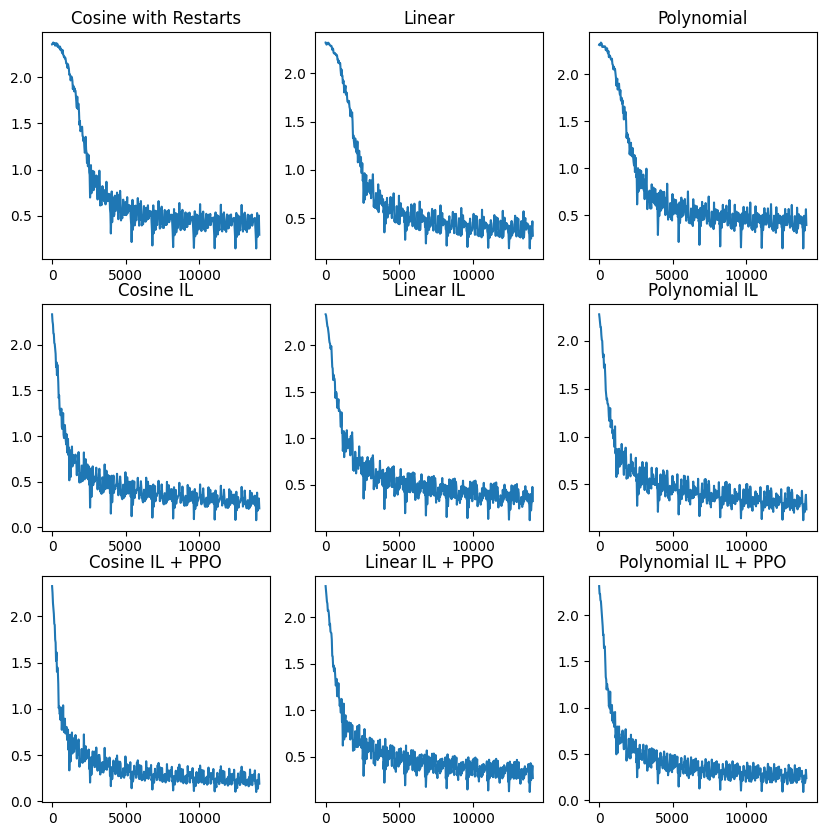

In [9]:
fig, axes = plt.subplots(3, 3)
plt.title('Train Loss')
fig.set_size_inches(10, 10)
train_loss['cosine_with_restarts_train_loss'][::30].plot.line(ax=axes[0, 0])
axes[0, 0].set_title('Cosine with Restarts')
train_loss['linear_train_loss'][::30].plot.line(ax=axes[0, 1])
axes[0, 1].set_title('Linear')
train_loss['polynomial_train_loss'][::30].plot.line(ax=axes[0, 2])
axes[0, 2].set_title('Polynomial')

train_loss['03.17-13:38:41-cosine_train_loss'][::30].plot.line(ax=axes[1, 0])
axes[1, 0].set_title('Cosine IL')
train_loss['03.18-16:48:38-linear_train_loss'][::30].plot.line(ax=axes[1, 1])
axes[1, 1].set_title('Linear IL')
train_loss['03.17-14:00:51-polynomial_train_loss'][::30].plot.line(ax=axes[1, 2])
axes[1, 2].set_title('Polynomial IL')

train_loss['03.18-08:39:44-cosine-final-ppo_train_loss'][::30].plot.line(ax=axes[2, 0])
axes[2, 0].set_title('Cosine IL + PPO')
train_loss['03.18-19:23:45-linear-final-ppo_train_loss'][::30].plot.line(ax=axes[2, 1])
axes[2, 1].set_title('Linear IL + PPO')
train_loss['03.18-15:44:18-polynomial-final-ppo_train_loss'][::30].plot.line(ax=axes[2, 2])
axes[2, 2].set_title('Polynomial IL + PPO')

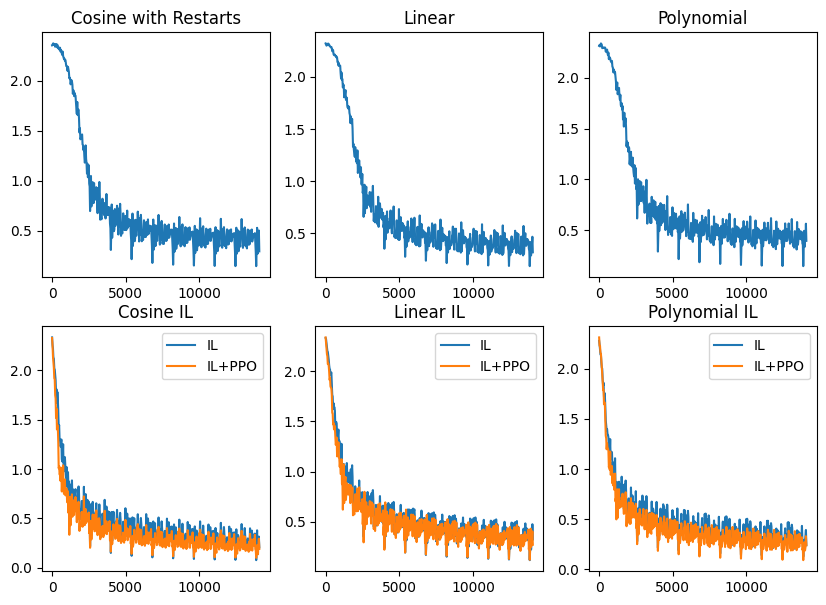

In [17]:
fig, axes = plt.subplots(2, 3)
plt.title('Train Loss')
fig.set_size_inches(10, 7)
train_loss['cosine_with_restarts_train_loss'][::30].plot.line(ax=axes[0, 0])
axes[0, 0].set_title('Cosine with Restarts')
train_loss['linear_train_loss'][::30].plot.line(ax=axes[0, 1])
axes[0, 1].set_title('Linear')
train_loss['polynomial_train_loss'][::30].plot.line(ax=axes[0, 2])
axes[0, 2].set_title('Polynomial')

il_lines = []
il_lines.append(train_loss['03.17-13:38:41-cosine_train_loss'][::30].plot.line(ax=axes[1, 0], label='IL'))
axes[1, 0].set_title('Cosine IL')
il_lines.append(train_loss['03.18-16:48:38-linear_train_loss'][::30].plot.line(ax=axes[1, 1], label='IL'))
axes[1, 1].set_title('Linear IL')
il_lines.append(train_loss['03.17-14:00:51-polynomial_train_loss'][::30].plot.line(ax=axes[1, 2], label='IL'))
axes[1, 2].set_title('Polynomial IL')

il_ppo_lines = []
il_ppo_lines.append(train_loss['03.18-08:39:44-cosine-final-ppo_train_loss'][::30].plot.line(ax=axes[1, 0], label='IL+PPO'))
il_ppo_lines.append(train_loss['03.18-19:23:45-linear-final-ppo_train_loss'][::30].plot.line(ax=axes[1, 1], label='IL+PPO'))
il_ppo_lines.append(train_loss['03.18-15:44:18-polynomial-final-ppo_train_loss'][::30].plot.line(ax=axes[1, 2], label='IL+PPO'))

for i in range(3):
    #axes[1, i].legend([il_lines[i], il_ppo_lines[i]], ['IL', 'IL+PPO'])
    axes[1, i].legend()

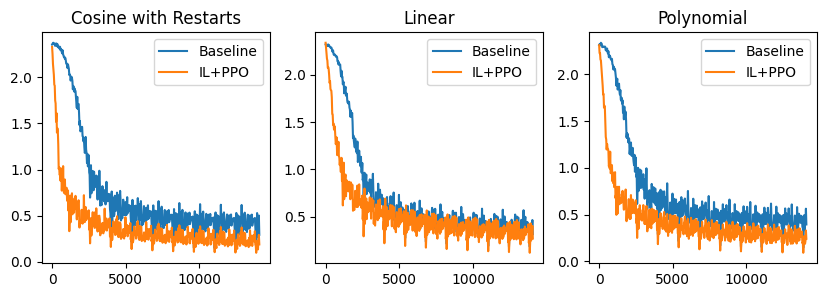

In [16]:
fig, axes = plt.subplots(1, 3)
plt.title('Train Loss')
fig.set_size_inches(10, 3)
train_loss['cosine_with_restarts_train_loss'][::30].plot.line(ax=axes[0], label='Baseline')
axes[0].set_title('Cosine with Restarts')
train_loss['linear_train_loss'][::30].plot.line(ax=axes[1], label='Baseline')
axes[1].set_title('Linear')
train_loss['polynomial_train_loss'][::30].plot.line(ax=axes[2], label='Baseline')
axes[2].set_title('Polynomial')

il_ppo_lines = []
il_ppo_lines.append(train_loss['03.18-08:39:44-cosine-final-ppo_train_loss'][::30].plot.line(ax=axes[0], label='IL+PPO'))
il_ppo_lines.append(train_loss['03.18-19:23:45-linear-final-ppo_train_loss'][::30].plot.line(ax=axes[1], label='IL+PPO'))
il_ppo_lines.append(train_loss['03.18-15:44:18-polynomial-final-ppo_train_loss'][::30].plot.line(ax=axes[2], label='IL+PPO'))

for i in range(3):
    #axes[1, i].legend([il_lines[i], il_ppo_lines[i]], ['IL', 'IL+PPO'])
    axes[i].legend()

In [ ]:
train_loss.keys()

Index(['03.08-06:15:13_train_loss', '03.12-16:11:01-6.0248-ppo_train_loss',
       '03.13-00:43:48-6.0028-ppo_train_loss',
       '03.13-00:43:48-6.5965-ppo_train_loss',
       '03.13-10:28:39-linear_train_loss',
       '03.13-10:50:51-cosine_with_restarts_train_loss',
       '03.13-11:04:23-polynomial_train_loss',
       '03.14-03:28:07-final-ppo_train_loss',
       '03.14-15:45:13-scratch-final-ppo_train_loss',
       '03.14-23:04:42-linear-final-ppo_train_loss',
       '03.15-17:06:06-cosine-final-ppo_train_loss', 'linear_train_loss',
       'cosine_with_restarts_train_loss', 'polynomial_train_loss'],
      dtype='object')

<Axes: >

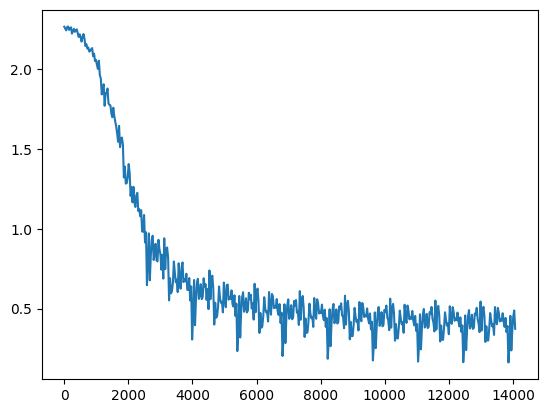

In [ ]:
train_loss['polynomial_train_loss'][::30].plot.line()

<Axes: >

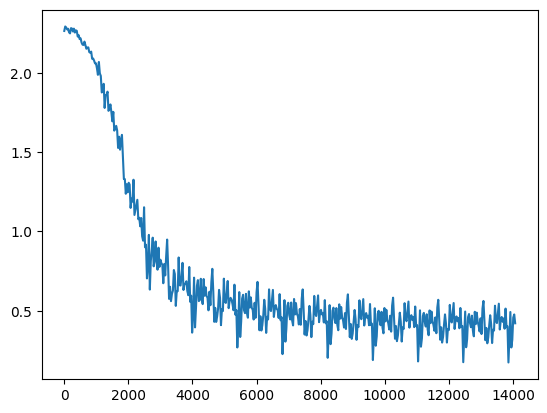

In [ ]:
train_loss['linear_train_loss'][::30].plot.line()

<Axes: >

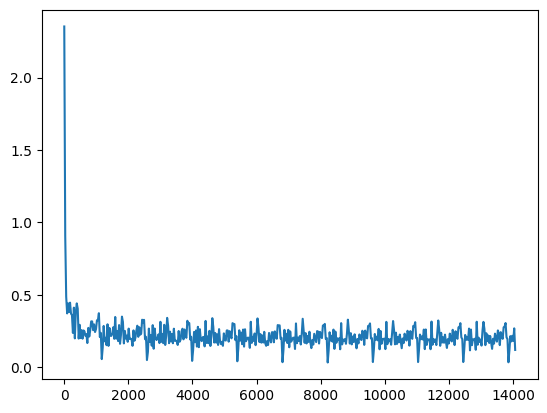

In [ ]:
train_loss['03.13-11:04:23-polynomial_train_loss'][::30].plot.line()

In [ ]:
eval_loss.loc[-512:, :].sum().sort_values(ascending=True)

03.08-06:15:13_eval_loss                         138.079650
03.13-00:43:48-6.0028-ppo_eval_loss              138.137346
03.15-17:06:06-cosine-final-ppo_eval_loss        139.493991
03.14-03:28:07-final-ppo_eval_loss               139.830269
03.14-23:04:42-linear-final-ppo_eval_loss        140.096685
03.13-00:43:48-6.5965-ppo_eval_loss              141.873985
03.12-16:11:01-6.0248-ppo_eval_loss              143.025731
cosine_with_restarts_eval_loss                   206.269694
03.14-15:45:13-scratch-final-ppo_eval_loss       209.115710
polynomial_eval_loss                             221.799201
linear_eval_loss                                 223.876376
03.13-10:28:39-linear_eval_loss                  407.829856
03.13-11:04:23-polynomial_eval_loss              520.774534
03.13-10:50:51-cosine_with_restarts_eval_loss    580.245787
dtype: float64

In [2]:
actions = pd.read_json('./result/mlp-mnist-action-3.json')
actions

,03.17-13:38:41-cosine,03.17-14:00:51-polynomial,03.17-14:22:11-linear,03.18-08:39:44-cosine-final-ppo,linear,cosine_with_restarts,polynomial
0,0.000132,0.000118,1,0.000195,3.546099e-08,3.546099e-08,3.546099e-08
1,0.000132,0.000118,1,0.000195,7.092199e-08,7.092199e-08,7.092199e-08
2,0.000132,0.000118,1,0.000195,1.063830e-07,1.063830e-07,1.063830e-07
3,0.000132,0.000118,1,0.000195,1.418440e-07,1.418440e-07,1.418440e-07
4,0.000132,0.000118,1,0.000195,1.773050e-07,1.773050e-07,1.773050e-07
...,...,...,...,...,...,...,...
14095,0.000140,0.000119,1,0.000212,3.546099e-08,3.102700e-11,1.354255e-07
14096,0.000140,0.000119,1,0.000212,2.659575e-08,1.745300e-11,1.265691e-07
14097,0.000140,0.000119,1,0.000212,1.773050e-08,7.757000e-12,1.177128e-07
14098,0.000140,0.000119,1,0.000212,8.865248e-09,1.939000e-12,1.088564e-07


<Axes: >

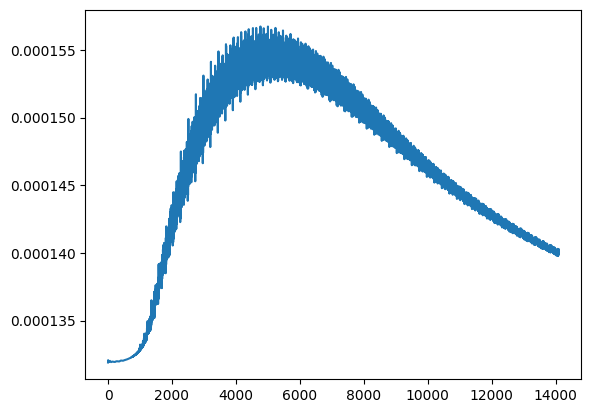

In [3]:
actions['03.17-13:38:41-cosine'].plot.line()

<Axes: ylabel='03.18-08:39:44-cosine-final-ppo'>

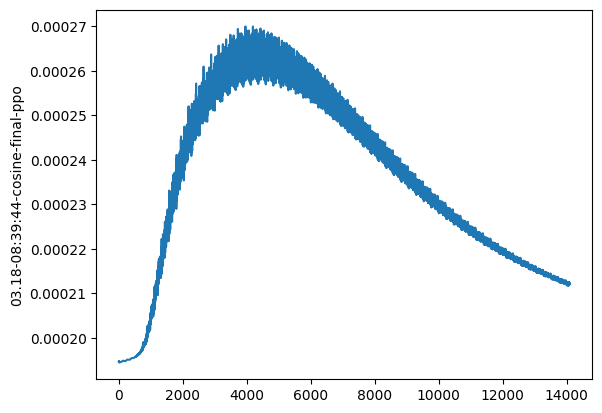

In [4]:
sns.lineplot(actions['03.18-08:39:44-cosine-final-ppo'])

In [5]:
actions['03.18-08:39:44-cosine-final-ppo'].describe()

count    14100.000000
mean         0.000236
std          0.000020
min          0.000194
25%          0.000220
50%          0.000237
75%          0.000255
max          0.000270
Name: 03.18-08:39:44-cosine-final-ppo, dtype: float64

<Axes: >

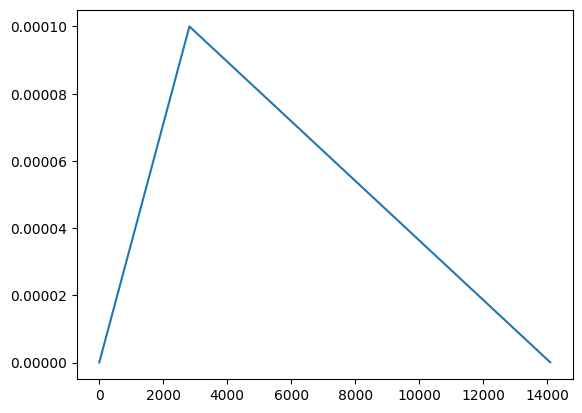

In [6]:
actions['polynomial'].plot.line()

<Axes: >

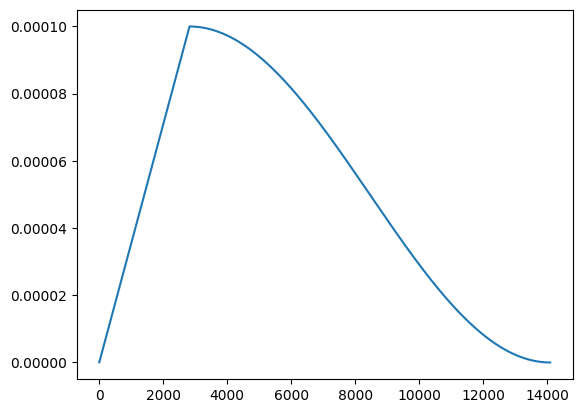

In [7]:
actions['cosine_with_restarts'].plot.line()

<Axes: >

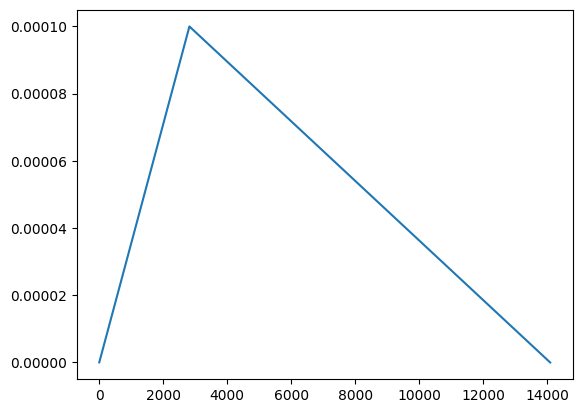

In [8]:
actions['linear'].plot.line()

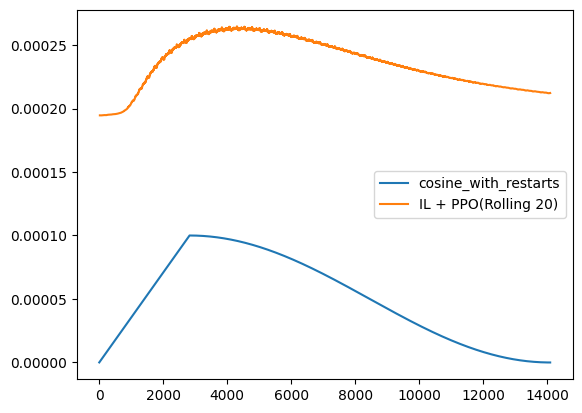

In [26]:
actions['cosine_with_restarts'].plot.line()
actions['03.18-08:39:44-cosine-final-ppo'].rolling(20).mean().plot.line(label='IL + PPO(Rolling 20)')
plt.legend()

In [3]:
actions.keys()

Index(['03.08-06:15:13', '03.13-10:28:39-linear',
       '03.13-10:50:51-cosine_with_restarts',
       '03.16-10:09:20-polynomial-final-ppo',
       '03.16-15:47:14-cosine-final-ppo', '03.16-20:29:58-cosine-final-ppo',
       'linear', 'cosine_with_restarts', 'polynomial'],
      dtype='object')

In [4]:
actions['03.16-20:29:58-cosine-final-ppo'].unique()

array([1.30289527e-27, 1.30286551e-27, 1.30323327e-27, 1.30367093e-27,
       1.30393951e-27, 1.30412844e-27, 1.30408366e-27, 1.30386478e-27,
       1.30379025e-27, 1.30394942e-27, 1.30411852e-27, 1.30422791e-27,
       1.30425777e-27, 1.30415829e-27, 1.30406874e-27, 1.30413836e-27,
       1.30428762e-27, 1.30438719e-27, 1.30444188e-27, 1.30439711e-27,
       1.30432748e-27, 1.30434732e-27, 1.30445190e-27, 1.30455137e-27,
       1.30461609e-27, 1.30460617e-27, 1.30454646e-27, 1.30453654e-27,
       1.30468580e-27, 1.30475543e-27, 1.30476043e-27, 1.30471566e-27,
       1.30468080e-27, 1.30478537e-27, 1.30483506e-27, 1.30485500e-27,
       1.30482014e-27, 1.30477035e-27, 1.30476534e-27, 1.30481523e-27,
       1.30486492e-27, 1.30478037e-27, 1.30479529e-27, 1.30480531e-27,
       1.30477546e-27, 1.30470564e-27, 1.30467088e-27, 1.30466587e-27,
       1.30464594e-27, 1.30459625e-27, 1.30453144e-27, 1.30450669e-27,
       1.30450159e-27, 1.30448175e-27, 1.30443688e-27, 1.30436725e-27,
      

In [15]:
losses2 = pd.read_json('./result/mlp-mnist-loss-2.json')
losses2.head()

,03.08-06:15:13_train_loss,03.08-06:15:13_eval_loss,03.13-10:28:39-linear_train_loss,03.13-10:28:39-linear_eval_loss,03.13-10:50:51-cosine_with_restarts_train_loss,03.13-10:50:51-cosine_with_restarts_eval_loss,03.16-10:09:20-polynomial-final-ppo_train_loss,03.16-10:09:20-polynomial-final-ppo_eval_loss,03.16-15:47:14-cosine-final-ppo_train_loss,03.16-15:47:14-cosine-final-ppo_eval_loss,linear_train_loss,linear_eval_loss,cosine_with_restarts_train_loss,cosine_with_restarts_eval_loss,polynomial_train_loss,polynomial_eval_loss
0,2.272229,0.0,2.307367,0.0,2.328598,0.0,2.360161,0.0,2.301993,0.0,2.321868,0.0,2.320406,0.0,2.313426,0.0
1,2.288562,0.0,2.298609,0.0,2.327091,0.0,2.362726,0.0,2.330986,0.0,2.310339,0.0,2.340787,0.0,2.327842,0.0
2,2.319278,0.0,2.278005,0.0,2.228740,0.0,2.329985,0.0,2.300396,0.0,2.316699,0.0,2.338081,0.0,2.348299,0.0
3,2.305017,0.0,2.219045,0.0,2.128039,0.0,2.313120,0.0,2.324978,0.0,2.302916,0.0,2.354979,0.0,2.320111,0.0
4,2.308790,0.0,2.181916,0.0,2.007121,0.0,2.334625,0.0,2.308828,0.0,2.309766,0.0,2.334781,0.0,2.331140,0.0


In [18]:
train_loss = losses2[[col for col in losses2.columns if col.endswith('_train_loss')]]
eval_loss = losses2[[col for col in losses2.columns if col.endswith('_eval_loss')]]
train_loss

,03.08-06:15:13_train_loss,03.13-10:28:39-linear_train_loss,03.13-10:50:51-cosine_with_restarts_train_loss,03.16-10:09:20-polynomial-final-ppo_train_loss,03.16-15:47:14-cosine-final-ppo_train_loss,linear_train_loss,cosine_with_restarts_train_loss,polynomial_train_loss
0,2.272229,2.307367,2.328598,2.360161,2.301993,2.321868,2.320406,2.313426
1,2.288562,2.298609,2.327091,2.362726,2.330986,2.310339,2.340787,2.327842
2,2.319278,2.278005,2.228740,2.329985,2.300396,2.316699,2.338081,2.348299
3,2.305017,2.219045,2.128039,2.313120,2.324978,2.302916,2.354979,2.320111
4,2.308790,2.181916,2.007121,2.334625,2.308828,2.309766,2.334781,2.331140
...,...,...,...,...,...,...,...,...
14095,2.133084,0.024813,0.051246,2.353386,2.336621,0.152710,0.125202,0.170288
14096,2.118451,0.106997,0.135283,2.377658,2.320406,0.330649,0.370892,0.266631
14097,2.129909,0.049498,0.061142,2.358030,2.337427,0.197580,0.236796,0.172915
14098,2.141243,0.191629,0.197046,2.349725,2.338074,0.339454,0.368492,0.330320
